In [1]:
#APPENDIX B

#hassas48, 400188482, Shaheer Hassan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#import csv from local save

heart_disease = pd.read_csv('heart_disease.csv')
#heart_disease.info() #to see which columns have missing data entries (Part 1) and datatype

#Remove all rows with missing values (have only rows that have data values for all categories) - Part 1
HD_rowremove=heart_disease.dropna()
#HD_rowremove.info()

In [3]:
#Part 2, remove the columns that are irrelavent to the question 
cleaned_HD= HD_rowremove.drop(columns=['Sex','Chest Pain','Trestbps','Chol','Fbs','Restecg','Thalach','Exang','Oldpeak','Ca','Thal'])
#cleaned_HD.info() #check the columns after removing 

In [4]:
#convert these specific categories' arguements into a numeric type of float or int, setting to 'coerce' error (Part 2)
cleaned_HD["Age"]=pd.to_numeric(cleaned_HD["Age"],errors='coerce') #since this is in object, must convert to numeric float
cleaned_HD["Slope"]=pd.to_numeric(cleaned_HD["Slope"],errors='coerce') #object, must convert
#cleaned_HD.dtypes

In [5]:
pd.options.display.float_format='{:.3f}'.format

In [6]:
#Remove entire rows with missing data points above to get complete dataset 
cleaned_HD_null=cleaned_HD.dropna()
#cleaned_HD_null.describe()

In [7]:
column = cleaned_HD_null["Age"]
max_value = column.max() 
#print(max_value)

In [8]:
Age1 = cleaned_HD_null[(0<cleaned_HD_null.Age)&(cleaned_HD_null.Age<100)]#Age requirements for Q3
Age1.info()
Slope = (cleaned_HD_null.Slope>=1)&(cleaned_HD_null.Slope<=3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 302
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            292 non-null    float64
 1   Slope          292 non-null    float64
 2   Heart_Disease  292 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.1 KB


In [9]:
#Obtain values with limitations of Age and slope defined above 

#cleaned_HD=cleaned_HD_null[Age1 & Slope]
#cleaned_HD.describe()

In [10]:
#Part 4 (all age variable creation)
#Ages variable with their conditions 
Age2 = cleaned_HD_null[(cleaned_HD_null.Age<=40)&(cleaned_HD_null.Age>0)]
Age3 = cleaned_HD_null[(cleaned_HD_null.Age>=41)&(cleaned_HD_null.Age<=50)]
Age4 = cleaned_HD_null[(cleaned_HD_null.Age>=51)&(cleaned_HD_null.Age<=60)]
Age5 = cleaned_HD_null[(cleaned_HD_null.Age>60)]


#dataframe variable that has different categories of ages 
Age_Category = pd.DataFrame({"Ages <= 40": Age2.Age, " Ages >= 41 & <= 50": Age3.Age, "Ages >= 51 & <= 60": Age4.Age, "Ages > 60": Age5.Age})


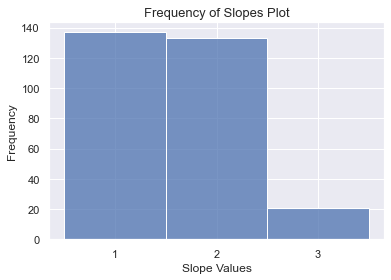

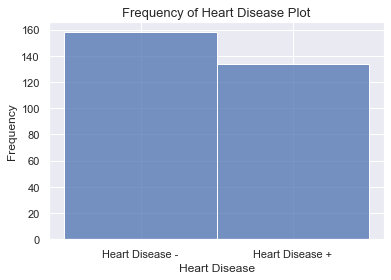

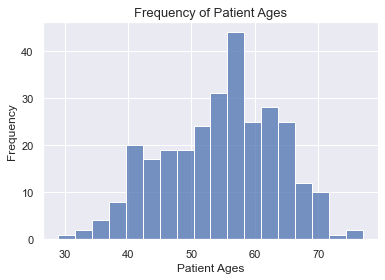

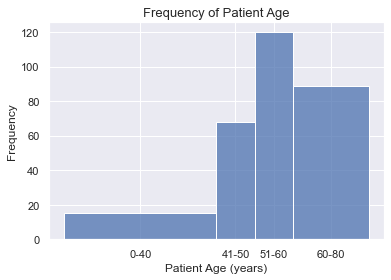

In [11]:
#Create Figures (Part 5)

#slope plot
sns.set()
h = sns.histplot(Age1['Slope'], bins=[1,2,3,4])
plt.xlabel('Slope Values')
plt.ylabel('Frequency')
plt.title('Frequency of Slopes Plot', size=13)
h.set_xticks([1.5, 2.5, 3.5])
h.set_xticklabels(["1", "2", "3"])
plt.savefig('SlopeHistogramQ2.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.show()

#Heart Disease plot
sns.set()
h = sns.histplot(Age1['Heart_Disease'], bins=[0,0.5,1])
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.title('Frequency of Heart Disease Plot', size=13)
h.set_xticks([0.25, 0.75])
h.set_xticklabels(["Heart Disease -", "Heart Disease +"])
plt.savefig('HDHistogramQ2.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.show()

#Histogram for Ages

sns.set()
h = sns.histplot(Age1['Age'], bins=18)
plt.xlabel('Patient Ages')
plt.ylabel('Frequency')
plt.title('Frequency of Patient Ages', size=13)
plt.savefig('AgeHistogramQ2.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.show()

#histogram plot for age category 

sns.set()
h = sns.histplot(Age1['Age'], bins=[0,40,50,60,80])
plt.xlabel('Patient Age (years)')
plt.ylabel('Frequency')
plt.title('Frequency of Patient Age', size=13)
h.set_xticks([20, 45, 55, 70])
h.set_xticklabels(["0-40", "41-50", "51-60", "60-80"])
plt.savefig('AgeCategoryQ2.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.show()

